## Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import pickle
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier

## Load data

In [2]:
data_train=pd.read_csv("BootstrapingData/train.csv")

In [3]:
data_train.head()

,ID,C_01,C_02,C_03,C_04,C_05,C_06,C_07,C_08,C_09,...,C_45,C_46,C_47,C_48,C_49,C_50,C_51,C_52,D_1,TARGET
0,674,41.902848,-87.643360,41.901540,-87.648066,41.901002,-87.642246,41.901952,-87.649264,41.900381,...,1114,607.755835,18.2125,0.442469,12.577837,0.089440,0.385996,0.013465,cat11,0.0
1,7397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,981,800.978593,514.1375,0.429966,16.390591,0.069741,0.174312,0.260958,cat01,0.0
2,11558,41.891421,-87.641041,41.897380,-87.651233,41.892190,-87.645894,41.898590,-87.651771,41.892631,...,706,699.008499,231.2625,0.357551,12.856969,0.094956,0.100567,0.055241,cat01,0.0
3,463,41.894619,-87.664955,41.896899,-87.657375,41.899288,-87.667246,41.897670,-87.658840,41.900640,...,947,633.389652,391.8000,0.334950,14.844393,0.087593,0.271383,0.155227,cat04,0.0
4,2409,41.896174,-87.649482,41.896501,-87.647639,41.895677,-87.646345,41.896954,-87.644895,41.896052,...,917,714.956332,80.7750,0.454336,12.954656,0.077860,0.149400,0.030534,cat07,0.0


## Preprossesing

In [4]:
df= data_train.copy()

### See Nan

<Axes: >

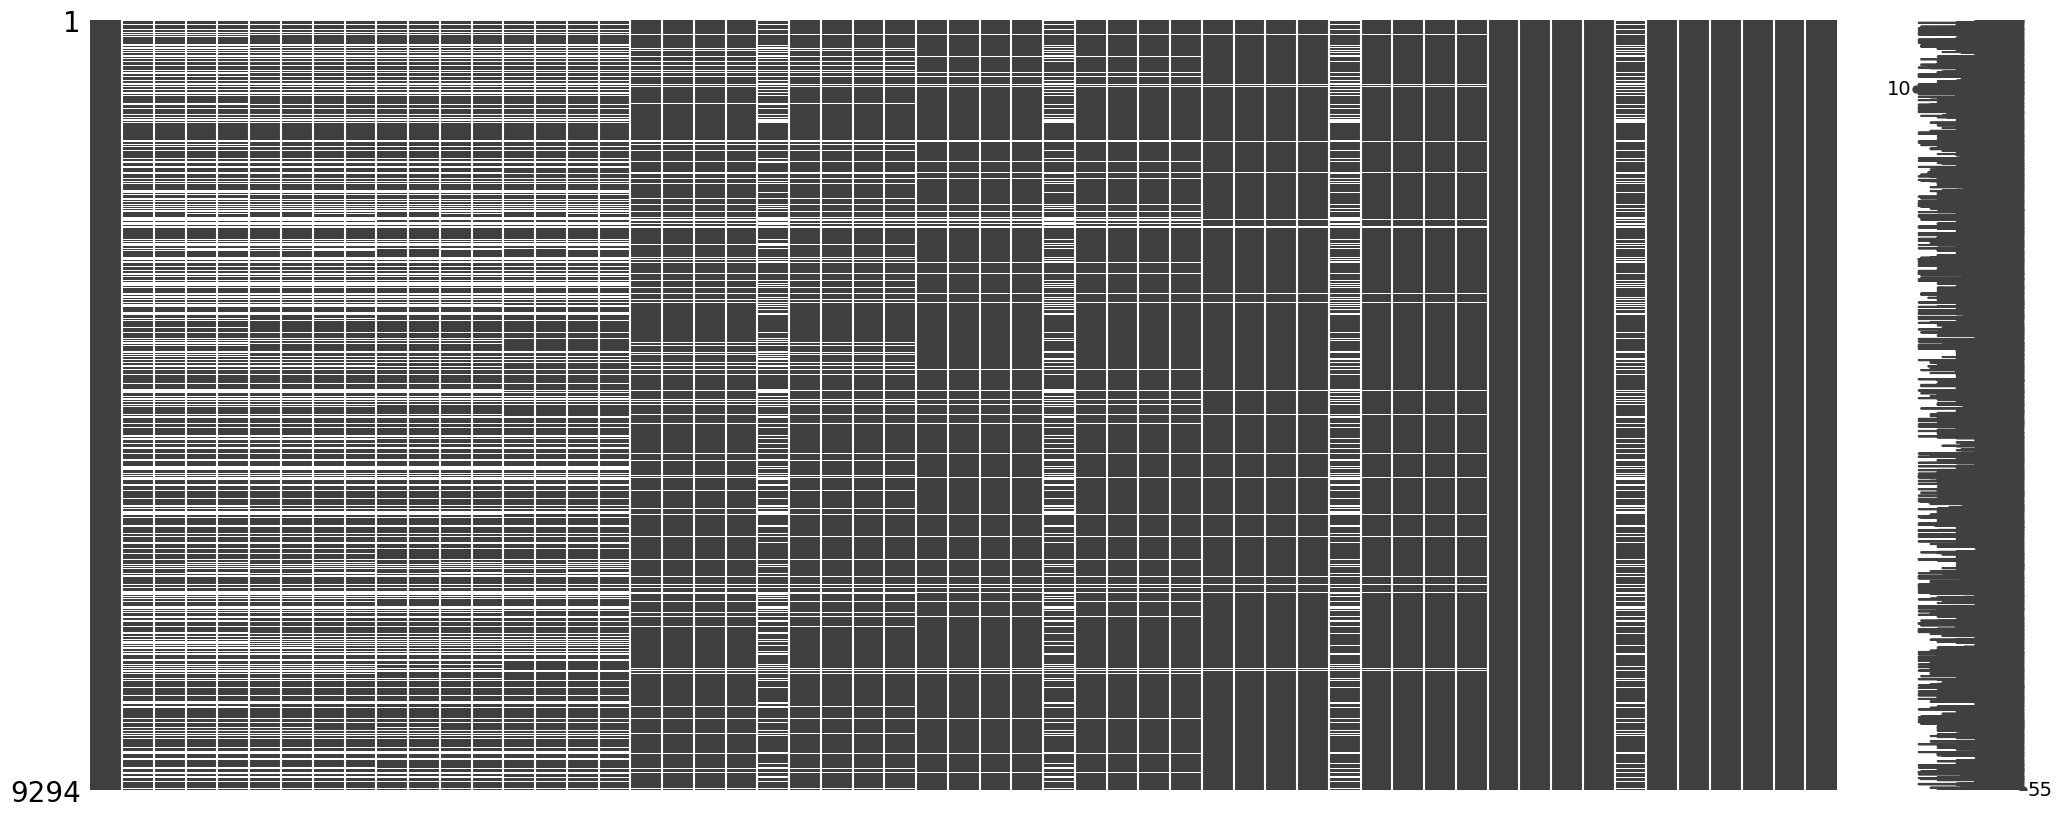

In [5]:
msno.matrix(df)

In [6]:
aux=df.isna().mean()

In [7]:
ls_drop= []
ls_full=[]
for index,value in aux.items():
    if(value>.3):
        ls_drop.append(index)
    else:
        if(value==0):
            ls_full.append(index)

In [8]:
ls_full= ls_full[1:-1]

In [9]:
df_aux= df.drop(columns=ls_drop)

<Axes: >

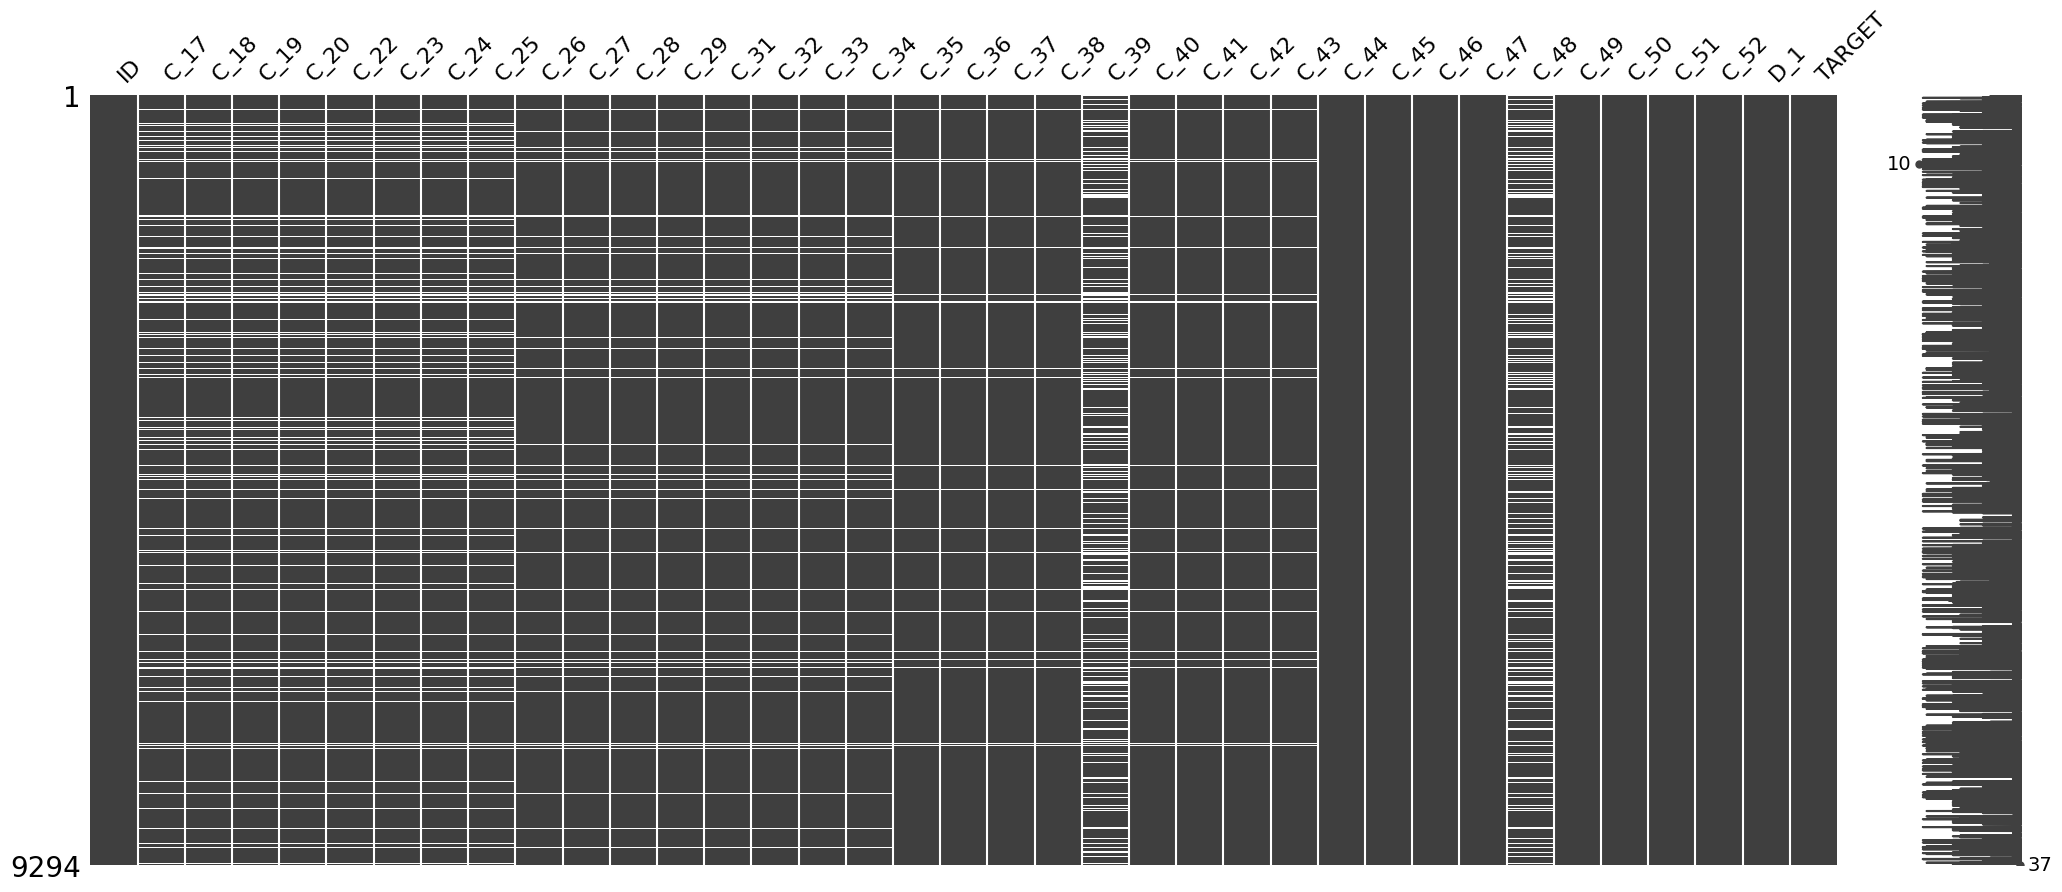

In [10]:
msno.matrix(df_aux)

### Correlation

/tmp/ipykernel_4218/910014618.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_aux.corr())


<Axes: >

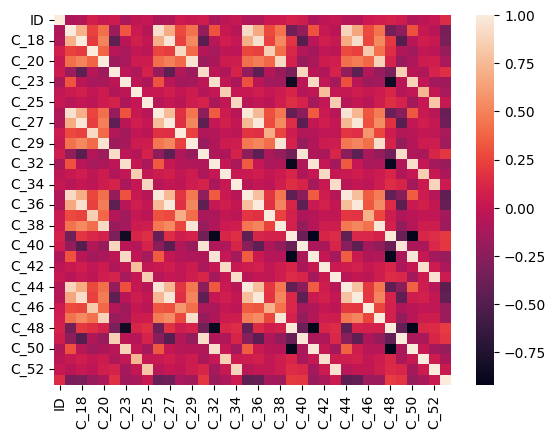

In [11]:
sns.heatmap(df_aux.corr())

In [12]:
df_correlation= df_aux.corr()[ls_full[:-1]].copy()

/tmp/ipykernel_4218/341250266.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_correlation= df_aux.corr()[ls_full[:-1]].copy()


In [13]:
df_correlation["correlaciones"]=(df_correlation>abs(.3)).sum(axis=1)

In [14]:
df_correlation[df_correlation.correlaciones==0]

,C_44,C_45,C_46,C_47,C_49,C_51,C_52,correlaciones
ID,-0.063391,-0.065227,0.034393,0.055705,0.052476,-0.038982,0.016543,0
C_23,0.289543,-0.044930,-0.159630,-0.139801,-0.036400,-0.005015,-0.145065,0
C_39,-0.439874,0.117909,0.120374,0.091290,-0.397411,0.110452,0.147074,0
C_48,-0.445300,0.099843,0.081171,0.081292,-0.419273,0.125741,0.134795,0
TARGET,-0.459810,-0.437863,-0.173213,-0.171441,0.183753,-0.116066,0.030562,0


In [15]:
ls_options=["C_23","C_39","C_48"]

In [16]:
df_aux.corr()[ls_options]>.3

/tmp/ipykernel_4218/2637937249.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_aux.corr()[ls_options]>.3


,C_23,C_39,C_48
ID,False,False,False
C_17,True,False,False
C_18,False,False,False
C_19,False,False,False
C_20,False,False,False
C_22,False,False,False
C_23,True,False,False
C_24,False,False,False
C_25,False,False,False
C_26,True,False,False


In [17]:
ls_best=["C_23","C_44","C_46","C_49","C_51","C_52","D_1"]

### Fill nan

<Axes: >

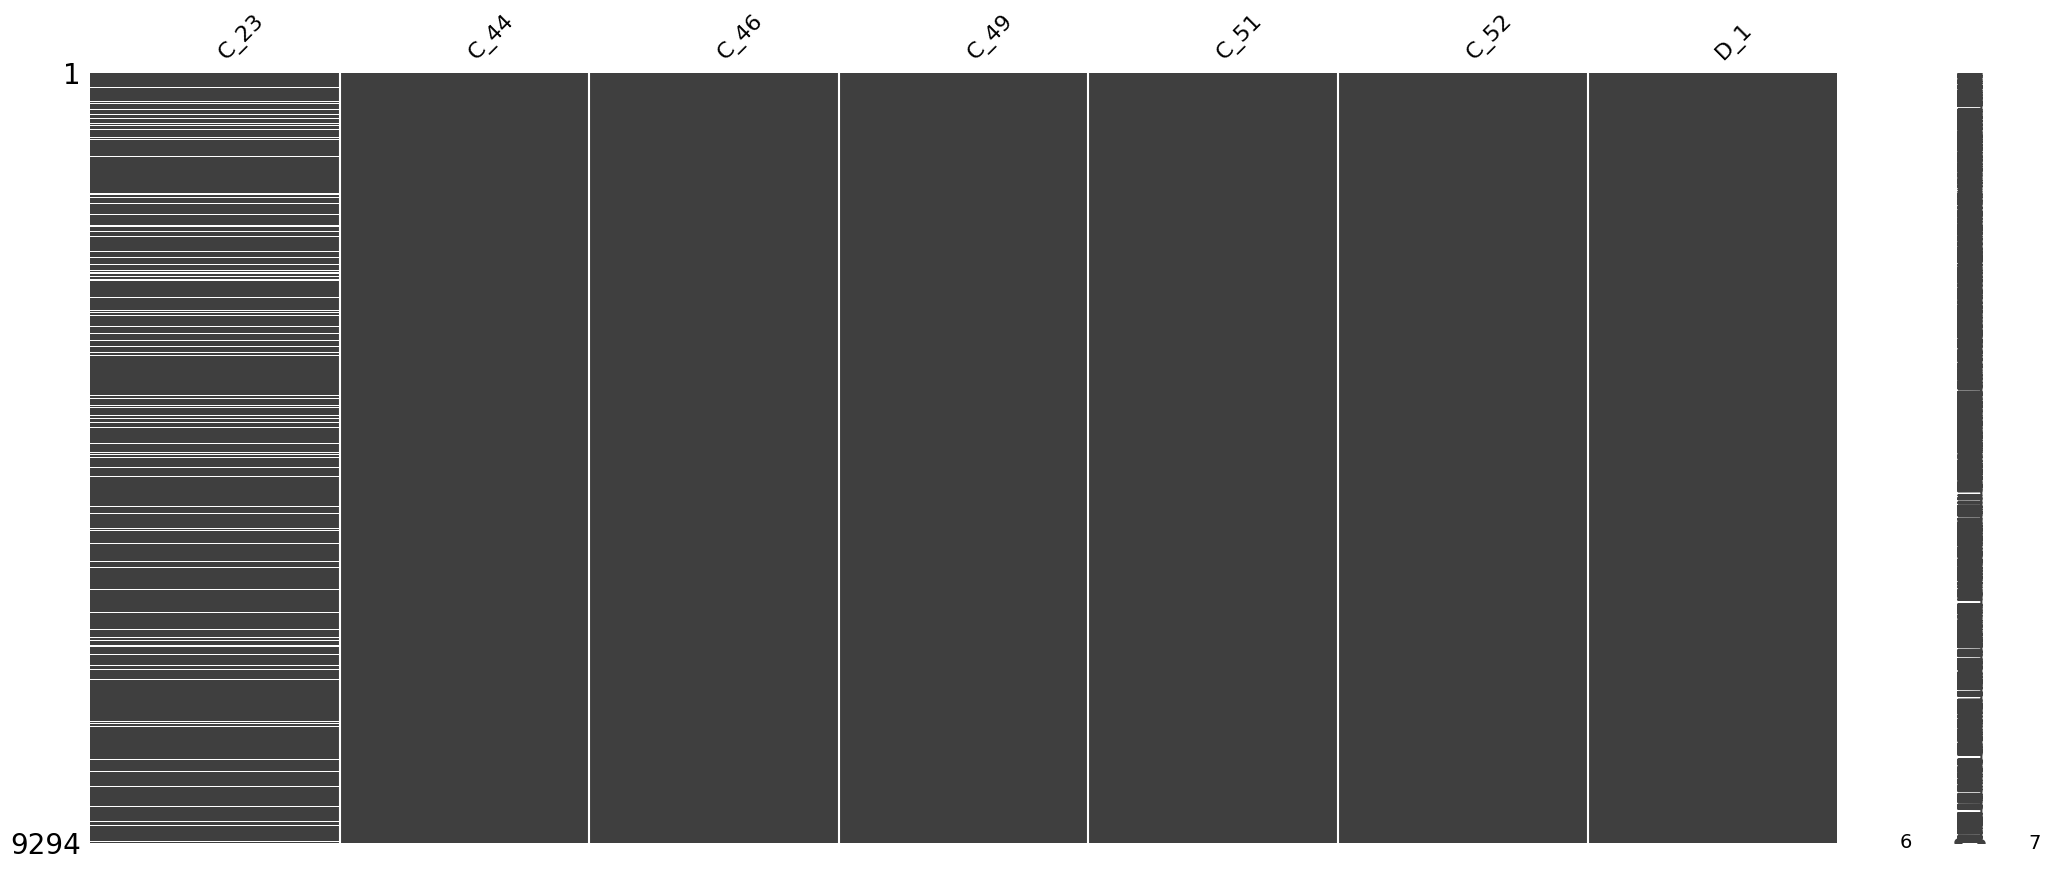

In [18]:
msno.matrix(df[ls_best])

In [19]:
df[ls_best].isna().mean()

C_23    0.13966
C_44    0.00000
C_46    0.00000
C_49    0.00000
C_51    0.00000
C_52    0.00000
D_1     0.00000
dtype: float64

In [20]:
df_clean=df[["ID"]+ls_best[:-1]].fillna(df[ls_best[:-1]].median()).copy()
df_clean["D_1"]= df[["D_1"]].fillna(df["D_1"].mode()[0])
df_clean["TARGET"]= df["TARGET"]

In [21]:
df_clean.head()

,ID,C_23,C_44,C_46,C_49,C_51,C_52,D_1,TARGET
0,674,0.076062,1416.46,607.755835,12.577837,0.385996,0.013465,cat11,0.0
1,7397,0.079347,1504.42,800.978593,16.390591,0.174312,0.260958,cat01,0.0
2,11558,0.107815,1065.77,699.008499,12.856969,0.100567,0.055241,cat01,0.0
3,463,0.078138,1385.09,633.389652,14.844393,0.271383,0.155227,cat04,0.0
4,2409,0.076502,1067.92,714.956332,12.954656,0.149400,0.030534,cat07,0.0


### Label encoder

In [22]:
le = LabelEncoder()
df_clean["D_1"]= le.fit_transform(df["D_1"])

In [23]:
filename = 'label_encoder.sav'
pickle.dump(le, open(filename, 'wb'))

### Scaling

In [24]:
X=df_clean.iloc[:,1:-1].values
y=df_clean.iloc[:,-1].values

In [25]:
sx= MinMaxScaler()
Xs= sx.fit_transform(X)

In [26]:
filename = 'MinMax.sav'
pickle.dump(sx, open(filename, 'wb'))

In [27]:
ls_var= [x for x in df_clean.columns]

In [28]:
def cleaner(df,ls_var):
    ls_drop= [x for x in df.columns if x not in ls_var]
    df.drop(columns= ls_drop, inplace= True)
    ls_cont= ls_var[1:-2]
    ls_dis= ls_var[-2]
    df[ls_cont]= df[ls_cont].fillna(df[ls_cont].median()).copy()
    df[ls_dis]=df[ls_dis].fillna(df[ls_dis].mode()[0]).copy()
    return df

In [29]:
df_valid= pd.read_csv("BootstrapingData/valid.csv")

In [30]:
df_valid_clean= cleaner(df_valid, ls_var)
df_valid_clean["D_1"]= le.fit_transform(df_valid_clean["D_1"])

In [31]:
X_valid=df_valid_clean.iloc[:,1:-1].values
y_valid=df_valid_clean.iloc[:,-1].values

In [32]:
Xs_valid= sx.transform(X_valid)

## Bootstraping

### Confidence interval

#### Logistic regression

In [34]:
N=500
T= 1000
ls=[x for x in range(len(df_clean))]
ls_auc= []
for t in range(T):
    sample = np.random.choice(ls,size=N,replace=True)
    X_sample= Xs[sample,:]
    y_sample= y[sample]
    ls_rest= [x for x in ls if x not in sample]
    clf = LogisticRegression(random_state=t, max_iter=200).fit(X_sample, y_sample)
    y_pred_proba= clf.predict_proba(Xs[ls_rest,:])[:,1]
    auc = roc_auc_score(y[ls_rest], y_pred_proba)
    ls_auc.append(auc)

In [35]:
auc_dist_log= np.array(ls_auc)

Intervalo de confianza de AUC con regresiones lógisticas 
[0.8384150278576832,0.8658619565282353]


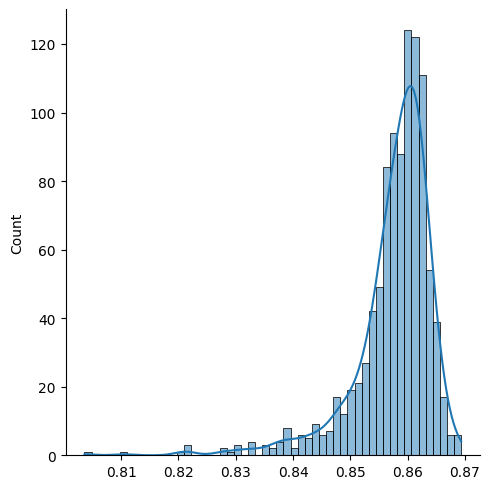

In [49]:
alpha = 0.05
sns.displot(auc_dist_log,cumulative=False,kde=True)
lb,ub = np.quantile(auc_dist_log,q=alpha/2),np.quantile(auc_dist_log,q=1-alpha/2)

print(f'Intervalo de confianza de AUC con regresiones lógisticas \n[{lb},{ub}]')

#### SVC

In [37]:
N=500
T= 1000
ls=[x for x in range(len(df_clean))]
ls_auc= []
for t in range(T):
    sample = np.random.choice(ls,size=N,replace=True)
    X_sample= Xs[sample,:]
    y_sample= y[sample]
    ls_rest= [x for x in ls if x not in sample]
    clf = SVC(random_state=t,probability=True).fit(X_sample, y_sample)
    y_pred_proba= clf.predict_proba(Xs[ls_rest])[:,1]
    auc = roc_auc_score(y[ls_rest], y_pred_proba)
    ls_auc.append(auc)

In [38]:
auc_dist_svc= np.array(ls_auc)

Intervalo de confianza de AUC con SVM 
[0.8436917326798874,0.9131211840213987]


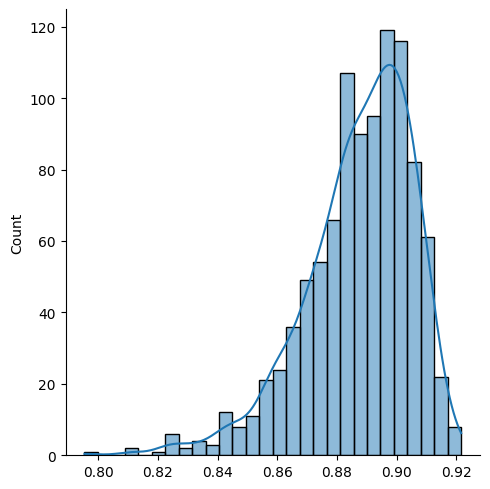

In [50]:
alpha = 0.05
sns.displot(auc_dist_svc,cumulative=False,kde=True)
lb,ub = np.quantile(auc_dist_svc,q=alpha/2),np.quantile(auc_dist_svc,q=1-alpha/2)

print(f'Intervalo de confianza de AUC con SVM \n[{lb},{ub}]')

#### Decision tree

In [40]:
N=500
T= 1000
ls=[x for x in range(len(df_clean))]
ls_auc= []
for t in range(T):
    sample = np.random.choice(ls,size=N,replace=True)
    X_sample= Xs[sample,:]
    y_sample= y[sample]
    ls_rest= [x for x in ls if x not in sample]
    clf =DecisionTreeClassifier(random_state=t, min_samples_leaf=5).fit(X_sample, y_sample)
    y_pred_proba= clf.predict_proba(Xs[ls_rest])[:,1]
    auc = roc_auc_score(y[ls_rest], y_pred_proba)
    ls_auc.append(auc)

In [41]:
auc_dist_svc= np.array(ls_auc)

Intervalo de confianza de AUC con arboles de decisión 
[0.8436917326798874,0.9131211840213987]


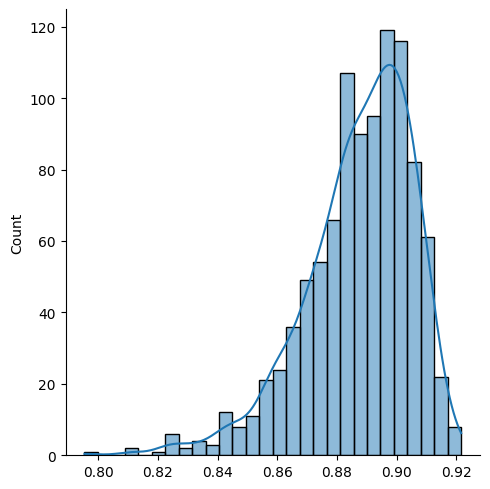

In [52]:
alpha = 0.05
sns.displot(auc_dist_svc,cumulative=False,kde=True)
lb,ub = np.quantile(auc_dist_svc,q=alpha/2),np.quantile(auc_dist_svc,q=1-alpha/2)

print(f'Intervalo de confianza de AUC con arboles de decisión \n[{lb},{ub}]')

## With valiadation

### Logistic regresion

In [53]:
N=500
T= 1000
ls=[x for x in range(len(df_clean))]
ls_models_log= []
for t in range(T):
    sample = np.random.choice(ls,size=N,replace=True)
    X_sample= Xs[sample,:]
    y_sample= y[sample]
    clf = LogisticRegression(random_state=t+1000, max_iter=200).fit(X_sample, y_sample)
    model= ("Log_"+str(t+1), clf)
    ls_models_log.append(model)
    

In [54]:
results=np.zeros([len(ls_models_log),len(df_valid_clean)]) 

In [55]:
for i, model in enumerate(ls_models_log):
    results[i,:]= model[1].predict_proba(Xs_valid)[:,1]

In [56]:
y_prob_ensem= np.mean(results, axis=0)

auc = roc_auc_score( y_valid, y_prob_ensem)

In [57]:
auc

0.8645204837865389

### Decision tree

In [34]:
N=500
T= 10000
ls=[x for x in range(len(df_clean))]
ls_models= []
for t in range(T):
    sample = np.random.choice(ls,size=N,replace=True)
    X_sample= Xs[sample,:]
    y_sample= y[sample]
    clf =DecisionTreeClassifier(random_state=t, min_samples_leaf=.01,min_samples_split=.01).fit(X_sample, y_sample)
    model= ("Tree_"+str(t+1), clf)
    ls_models.append(model)

In [35]:
results_tree=np.zeros([len(ls_models),len(df_valid_clean)]) 

In [36]:
for i, model in enumerate(ls_models):
    results_tree[i,:]= model[1].predict_proba(Xs_valid)[:,1]

In [37]:
y_prob_tree= np.mean(results_tree, axis=0)
auc = roc_auc_score( y_valid, y_prob_tree)

In [38]:
auc

0.9468521273567144

## Test

In [63]:
data_test= pd.read_csv("BootstrapingData/test.csv")

In [64]:
data_test["TARGET"]= [0 for x in range(len(data_test))]

In [65]:
df_test= cleaner(data_test, ls_var)
df_test["D_1"]= le.fit_transform(df_test["D_1"])

In [66]:
X_test=df_test.iloc[:,1:-1].values

In [67]:
Xs_test= sx.transform(X_test)

### Logistic regresion

In [68]:
results_test= results=np.zeros([len(ls_models_log),len(df_test)]) 

In [70]:
for i, model in enumerate(ls_models_log):
    results_test[i,:]= model[1].predict(Xs_test)

In [71]:
results_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [72]:
voting= np.mean(results_test, axis=0)
voting= voting>=.5

In [73]:
voting.mean()

0.0022130013831258644

In [74]:
ls_y=[]
for vote in voting:
    if(vote):
        ls_y.append(1)
    else:
        ls_y.append(0)
df_test["TARGET"]= ls_y

In [78]:
df_test[["ID","TARGET"]].to_parquet('results.gzip', compression='gzip')

## Best vars

- c_36

### Cosas chidas

- SelectKbest
- 